# Metis Admissions Challenge 2: 
### Extra Credit Retrieve some information using the github API

In [125]:
import pandas as pd

In [126]:
d3commits = pd.read_json('d3commits.json', dtype=[{'week':'datetime'}], convert_dates=['week'])

In [266]:
bar = pd.read_json('activity.json', dtype=[{'week':'datetime'}], convert_dates=['week'])

### lets check out what our dataframe looks like

In [137]:
print d3commits.dtypes
d3commits.head()

days             object
total             int64
week     datetime64[ns]
dtype: object


,days,total,week
0,"[0, 0, 1, 0, 0, 0, 0]",1,2016-05-29
1,"[0, 0, 3, 19, 19, 14, 1]",56,2016-06-05
2,"[0, 40, 30, 14, 0, 0, 0]",84,2016-06-12
3,"[3, 16, 10, 26, 38, 17, 17]",127,2016-06-19
4,"[0, 4, 3, 1, 1, 4, 0]",13,2016-06-26


### What week in the last year had the greatest number of commits?

In [135]:
print d3commits.nlargest(1, 'total')

                          days  total       week
3  [3, 16, 10, 26, 38, 17, 17]    127 2016-06-19


### separate the 'days' column into individual columns

In [138]:
days=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
d3commits[days] = pd.DataFrame([x for x in d3commits.days])
d3commits.drop('days', inplace=True, axis=1)
d3commits.head()

,total,week,sun,mon,tue,wed,thu,fri,sat
0,1,2016-05-29,0,0,1,0,0,0,0
1,56,2016-06-05,0,0,3,19,19,14,1
2,84,2016-06-12,0,40,30,14,0,0,0
3,127,2016-06-19,3,16,10,26,38,17,17
4,13,2016-06-26,0,4,3,1,1,4,0


### what are total number of commits for each day over the past 52 weeks?

In [117]:
for day in days:
    print day, d3commits[day].sum()
    
days_sum = [d3commits[day].sum() for day in days]


sun 15
mon 80
tue 61
wed 68
thu 72
fri 54
sat 23


### let's graph it!

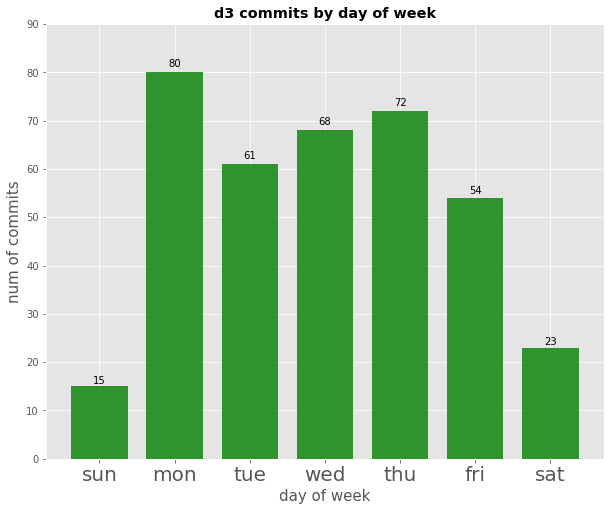

In [232]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np
ind = np.arange(7)
fig=plt.figure(figsize=(10,8))
fig.add_axes()



ax1 = fig.add_subplot(111)
rects = ax1.bar(ind, days_sum, width=.75, color='g', alpha=0.8)
ax1.set_xticks(ind)
ax1.set_xticklabels((days), fontsize=20)
ax1.set_ylim(0,90)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)

ax1.set_title('d3 commits by day of week', fontweight='bold')
ax1.set_xlabel('day of week', fontsize=15)
ax1.set_ylabel('num of commits', fontsize=15)

plt.show()

### let's look at some more data, like the number of commits per hour for each day

In [146]:
d3hours = pd.read_json('punch_card.json', convert_dates=['week'])
d3hours.columns=['day', 'hour', 'commits']

In [253]:
d3hours.head()

,day,hour,commits
0,0,0,7
1,0,1,0
2,0,2,1
3,0,3,0
4,0,4,0


let's transform this into something a little more understandable

In [224]:
tim = pd.DataFrame({'hour':range(0,24)}).set_index('hour')
for i in range(0,7):
    temp = d3hours[d3hours.day == i].loc[:,['commits']].values
    tim[i] = temp
    
    

In [225]:
tim.rename(columns = dict(zip(range(0,7), days)), inplace=True)

In [264]:
tim.head()

,sun,mon,tue,wed,thu,fri,sat
hour,,,,,,,
0,7,6,13,11,16,9,24
1,0,3,2,5,0,2,6
2,1,2,7,5,1,0,0
3,0,2,1,0,0,0,0
4,0,6,0,1,0,0,0


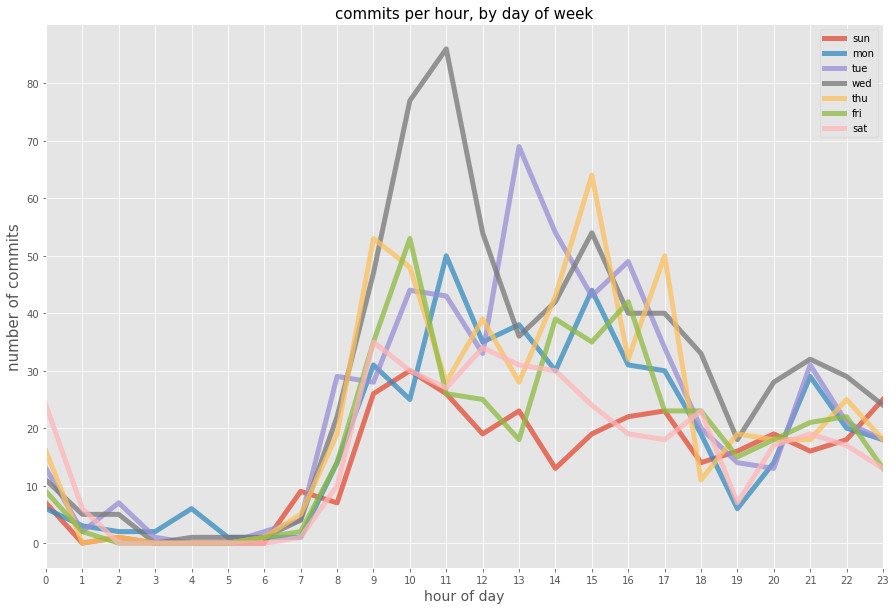

In [263]:
ax = tim.plot(figsize=(15,10), xticks=np.arange(24), yticks=np.arange(0,90,10), linewidth=5, alpha=0.75)
ax.set_title ('commits per hour, by day of week', fontsize=15)
ax.set_ylabel('number of commits', fontsize=15)
ax.set_xlabel('hour of day', fontsize=14)

plt.show()

### Here are just a few things we can learn from our data using both graphs:
- Most of the commits for d3 occur between 9AM and 5PM
- There are very few commits between 1AM and 7AM
- On every day besides Sunday, there is an increase in the number of commits at 9PM
- There is a sharp drop in the number of commits at 7PM
- Wednesday is the most popular day for commits, followed by Thursday and Wednesday
- There are relatively fewer commits on Tuesday and Friday
- There are more commits during the week than the weekends
- The number of commits during the week peaks at Monday, drops Tuesday, and increases to another peak on Thursday, and Friday has the lowest number of commits during the week

### Possible next steps:
- Test if the difference between weekdays and weekends is statistically significant
- Drill down to try and understand why there is such a large jump in commits on Wednesdays at 11AM
- Look at the commit history on github and find out why there were so many commits in June of 2016

